### Load data

In [2]:
# load data
import pandas as pd

# Code is from: https://github.com/SAILResearch/AI_Teammates_in_SE3/blob/main/analysis/load_AIDev.ipynb

# Basic
pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/repository.parquet")
user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/user.parquet")

# Comments and reviews
pr_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_comments.parquet")
pr_reviews_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_review_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_review_comments_v2.parquet")

# Commits
pr_commits_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")

# Related issues
related_issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")
issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/issue.parquet")

# Events
pr_timeline_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_timeline.parquet")

# Task type
pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_task_type.parquet")

# Human-PR
human_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pull_request.parquet")
human_pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pr_task_type.parquet")

/Users/guanhao/Desktop/Coding-Agent-Code/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Code is from: https://github.com/SAILResearch/AI_Teammates_in_SE3/blob/main/analysis/load_AIDev.ipynb

print(f"len(pr_df): {len(pr_df)}")
print(f"len(repo_df): {len(repo_df)}")
print(f"len(user_df): {len(user_df)}")

print(f"len(pr_comments_df): {len(pr_comments_df)}")
print(f"len(pr_reviews_df): {len(pr_reviews_df)}")
print(f"len(pr_review_comments_df): {len(pr_review_comments_df)}")

print(f"len(pr_commits_df): {len(pr_commits_df)}")
print(f"len(pr_commit_details_df): {len(pr_commit_details_df)}")


print(f"len(related_issue_df): {len(related_issue_df)}")
print(f"len(issue_df): {len(issue_df)}")

print(f"len(pr_timeline_df): {len(pr_timeline_df)}")

print(f"len(pr_task_type_df): {len(pr_task_type_df)}")

print(f"len(human_pr_df): {len(human_pr_df)}")
print(f"len(human_pr_task_type_df): {len(human_pr_task_type_df)}")
     

len(pr_df): 33596
len(repo_df): 2807
len(user_df): 1796
len(pr_comments_df): 39122
len(pr_reviews_df): 28875
len(pr_review_comments_df): 26868
len(pr_commits_df): 88576
len(pr_commit_details_df): 711923
len(related_issue_df): 4923
len(issue_df): 4614
len(pr_timeline_df): 325500
len(pr_task_type_df): 33596
len(human_pr_df): 6618
len(human_pr_task_type_df): 6618


In [4]:
# Code is from: https://github.com/SAILResearch/AI_Teammates_in_SE3/blob/main/analysis/load_AIDev.ipynb
# Extract patches from merged Agentic-PRs

merged_pr_mask = ~pr_df['merged_at'].isna()
merged_pr_ids = pr_df[merged_pr_mask]['id']
patch_mask = pr_commit_details_df['pr_id'].isin(merged_pr_ids)
pr_commit_details_df[patch_mask]['patch'].dropna()

0         @@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n...
1         @@ -0,0 +1,47 @@\n+import os\n+from pathlib im...
3         @@ -1,47 +1,48 @@\n import os\n from pathlib i...
4         @@ -3,45 +3,60 @@\n \n \n def compile_llms_txt...
6         @@ -1,29 +1,34 @@\n-import os\n from pathlib i...
                                ...                        
711885    @@ -2,6 +2,7 @@\n \n Servers focused on static...
711918    @@ -0,0 +1,53 @@\n+# numbagg Development Guide...
711919    @@ -49,5 +49,5 @@ uv run pytest numbagg/test/t...
711920    @@ -339,7 +339,7 @@\n                         ...
711921    @@ -1117,7 +1117,7 @@ export interface ModelHi...
Name: patch, Length: 402836, dtype: object

In [5]:
# Code is from: https://github.com/SAILResearch/AI_Teammates_in_SE3/blob/main/analysis/load_AIDev.ipynb
pr_task_type_df['type'].value_counts()

type
feat        14450
fix          8106
docs         3887
test         2356
refactor     2288
chore         896
build         627
ci            411
perf          340
style         188
other          31
revert         16
Name: count, dtype: int64

In [6]:
pr_task_type_df.head()


,agent,id,title,reason,type,confidence
0,Claude_Code,3264933329,Fix: Wait for all partitions in load_collectio...,title provides conventional commit label,fix,10
1,Claude_Code,3265709660,feat: add comprehensive README screenshots wit...,title provides conventional commit label,feat,10
2,Claude_Code,3265782173,chore: remove HashedPostStateProvider trait,title provides conventional commit label,chore,10
3,Claude_Code,3231949586,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10
4,Claude_Code,3231950376,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10


In [10]:
feat_pr_ids = pr_task_type_df[
    (pr_task_type_df['type'] == 'feat') &
    (pr_task_type_df['id'].isin(merged_pr_ids))
]['id']

num_commits = pr_commit_details_df[pr_commit_details_df['pr_id'].isin(feat_pr_ids)]
print("Total number of commit in feat pr: ", len(num_commits))

Total number of commit in feat pr:  214589


In [7]:
# exract patches in feat prs

merged_pr_ids = pr_df[~pr_df['merged_at'].isna()]['id']


feat_pr_ids = pr_task_type_df[
    (pr_task_type_df['type'] == 'feat') &
    (pr_task_type_df['id'].isin(merged_pr_ids))
]['id']

feat_patch_mask = pr_commit_details_df['pr_id'].isin(feat_pr_ids)
feat_patches = pr_commit_details_df[feat_patch_mask]['patch'].dropna()

feat_patches

0         @@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n...
1         @@ -0,0 +1,47 @@\n+import os\n+from pathlib im...
3         @@ -1,47 +1,48 @@\n import os\n from pathlib i...
4         @@ -3,45 +3,60 @@\n \n \n def compile_llms_txt...
6         @@ -1,29 +1,34 @@\n-import os\n from pathlib i...
                                ...                        
711878    @@ -13,6 +13,16 @@\n     "convex": "cd package...
711879    @@ -1,6 +1,6 @@\n # OpenAgents\n \n-Claude Cod...
711880    @@ -64,6 +64,9 @@ function App() {\n   // Conv...
711881    @@ -150,4 +150,54 @@ bun run install:all  # Re...
711885    @@ -2,6 +2,7 @@\n \n Servers focused on static...
Name: patch, Length: 199536, dtype: object

### Looking at Data

In [8]:
import os
from collections import Counter

ext_counter = Counter()

for _, row in pr_commit_details_df.iterrows():
    filename = row["filename"]
    
    if pd.isna(filename):
        continue
    
    # get extension
    ext = os.path.splitext(filename)[1]
    
    ext_counter[ext] += 1


for ext, count in ext_counter.most_common():
    print(ext, count)

.ts 92549
.md 56430
.py 52898
.tsx 44071
.out 39654
.json 38708
.cs 37938
.go 34729
.js 25868
.mochi 20765
.error 18729
.rs 18132
.java 16884
.rb 13044
.mdx 12601
.yaml 12033
.yml 11128
.png 9439
 7204
.dart 6682
.html 6210
.txt 6073
.kt 5985
.cpp 5326
.toml 4898
.php 4341
.xml 3659
.lock 3447
.c 3441
.zig 3225
.xlf 3072
.swift 2909
.css 2761
.sh 2656
.h 2631
.fs 2539
.sql 2421
.csproj 2337
.bench 2297
.svg 2294
.lua 2276
.axaml 1940
.ast 1786
.scala 1645
.ps1 1605
.clj 1456
.ml 1379
.erl 1375
.map 1312
.exs 1301
.psm1 1143
.rst 1106
.vue 1038
.bsl 1021
.scm 1015
.mjs 994
.ipynb 958
.pb 931
.svelte 895
.snap 893
.bicep 891
.hs 879
.pas 871
.rkt 866
.erb 819
.pl 803
.jsx 789
.f90 785
.vb 705
.tsp 663
.razor 658
.diff 634
.scss 619
.props 590
.resx 574
.properties 561
.st 535
.cmake 520
.gem 504
.pyc 500
.jsonc 486
.ex 475
.mod 451
.gradle 445
.tf 440
.sample 434
.lcl 412
.ir 411
.slt 409
.example 399
.xhtml 398
.bak 382
.mts 370
.sum 370
.jl 363
.targets 356
.cob 355
.golden 353
.jsonl 

In [ ]:
# draw diagrams see programming language distribution
ext_counter.most_common()

[('.ts', 92549),
 ('.md', 56430),
 ('.py', 52898),
 ('.tsx', 44071),
 ('.out', 39654),
 ('.json', 38708),
 ('.cs', 37938),
 ('.go', 34729),
 ('.js', 25868),
 ('.mochi', 20765),
 ('.error', 18729),
 ('.rs', 18132),
 ('.java', 16884),
 ('.rb', 13044),
 ('.mdx', 12601),
 ('.yaml', 12033),
 ('.yml', 11128),
 ('.png', 9439),
 ('', 7204),
 ('.dart', 6682),
 ('.html', 6210),
 ('.txt', 6073),
 ('.kt', 5985),
 ('.cpp', 5326),
 ('.toml', 4898),
 ('.php', 4341),
 ('.xml', 3659),
 ('.lock', 3447),
 ('.c', 3441),
 ('.zig', 3225),
 ('.xlf', 3072),
 ('.swift', 2909),
 ('.css', 2761),
 ('.sh', 2656),
 ('.h', 2631),
 ('.fs', 2539),
 ('.sql', 2421),
 ('.csproj', 2337),
 ('.bench', 2297),
 ('.svg', 2294),
 ('.lua', 2276),
 ('.axaml', 1940),
 ('.ast', 1786),
 ('.scala', 1645),
 ('.ps1', 1605),
 ('.clj', 1456),
 ('.ml', 1379),
 ('.erl', 1375),
 ('.map', 1312),
 ('.exs', 1301),
 ('.psm1', 1143),
 ('.rst', 1106),
 ('.vue', 1038),
 ('.bsl', 1021),
 ('.scm', 1015),
 ('.mjs', 994),
 ('.ipynb', 958),
 ('.pb', 93

In [10]:
output_lines = []

TOP_K = len(ext_counter)

for ext, count in ext_counter.most_common(TOP_K):
    if ext == "":
        ext_print = "(no extension)"
    else:
        ext_print = ext
    
    line = f"{ext_print}: {count} files"
    output_lines.append(line)

with open("appendix_file_extensions.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(output_lines))

print("\n".join(output_lines[:]))

.ts: 92549 files
.md: 56430 files
.py: 52898 files
.tsx: 44071 files
.out: 39654 files
.json: 38708 files
.cs: 37938 files
.go: 34729 files
.js: 25868 files
.mochi: 20765 files
.error: 18729 files
.rs: 18132 files
.java: 16884 files
.rb: 13044 files
.mdx: 12601 files
.yaml: 12033 files
.yml: 11128 files
.png: 9439 files
(no extension): 7204 files
.dart: 6682 files
.html: 6210 files
.txt: 6073 files
.kt: 5985 files
.cpp: 5326 files
.toml: 4898 files
.php: 4341 files
.xml: 3659 files
.lock: 3447 files
.c: 3441 files
.zig: 3225 files
.xlf: 3072 files
.swift: 2909 files
.css: 2761 files
.sh: 2656 files
.h: 2631 files
.fs: 2539 files
.sql: 2421 files
.csproj: 2337 files
.bench: 2297 files
.svg: 2294 files
.lua: 2276 files
.axaml: 1940 files
.ast: 1786 files
.scala: 1645 files
.ps1: 1605 files
.clj: 1456 files
.ml: 1379 files
.erl: 1375 files
.map: 1312 files
.exs: 1301 files
.psm1: 1143 files
.rst: 1106 files
.vue: 1038 files
.bsl: 1021 files
.scm: 1015 files
.mjs: 994 files
.ipynb: 958 fil

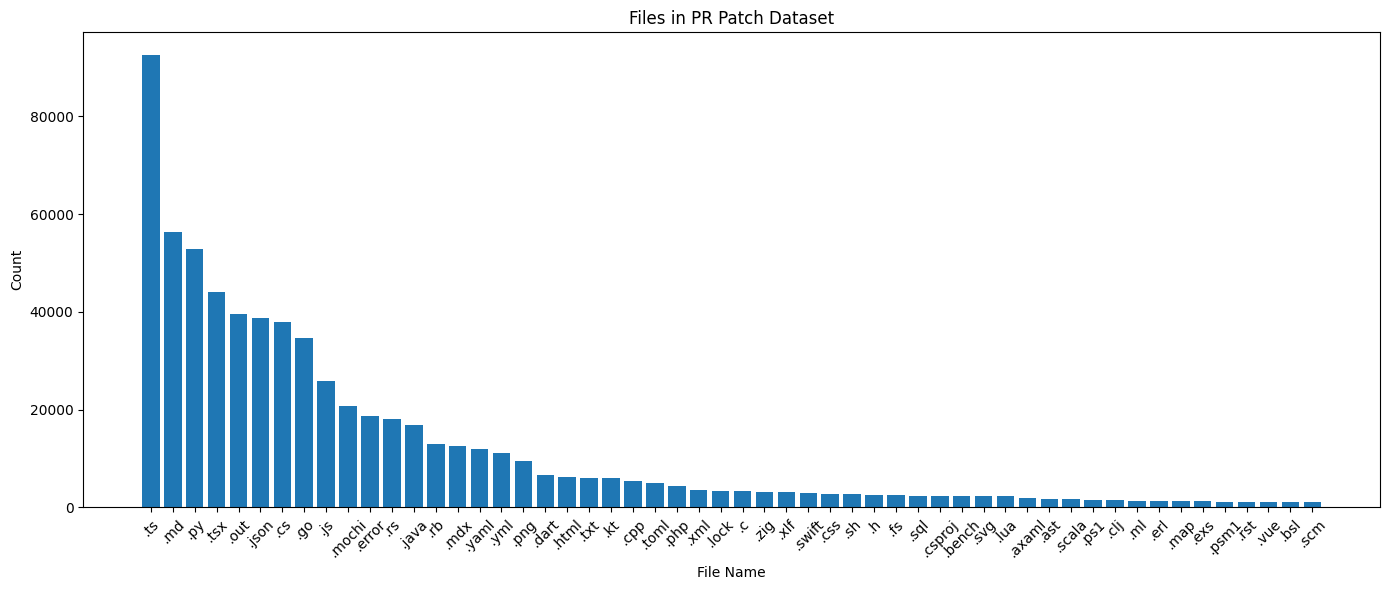

In [11]:
import matplotlib.pyplot as plt
from collections import Counter
import re

clean_ext_counter = Counter()

for ext, count in ext_counter.items():

    if ext is None or ext.strip() == "":
        continue
    
    if re.match(r"\.0~", ext):
        continue
    
    # TODO: to be decided
    # file extension over 1000 times will be shown in the graph
    if count < 1000:
        continue

    clean_ext_counter[ext] += count

top_ext = clean_ext_counter.most_common()

labels = [x[0] for x in top_ext]
values = [x[1] for x in top_ext]

other_sum = sum(clean_ext_counter.values()) - sum(values)
labels.append("Other")
values.append(other_sum)

plt.figure(figsize=(14, 6))
plt.bar(labels[:-1], values[:-1])
plt.xticks(rotation=45)
plt.title("Files in PR Patch Dataset")
plt.xlabel("File Name")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [12]:
import os
import pandas as pd


# top 10 programming languages in Github Report: https://github.blog/news-insights/octoverse/octoverse-a-new-developer-joins-github-every-second-as-ai-leads-typescript-to-1/
LANG_MAP = {
    # Python
    ".py": "python",

    # JavaScript
    ".js": "javascript",
    ".jsx": "javascript",
    ".mjs": "javascript",
    ".cjs": "javascript",

    # TypeScript
    ".ts": "typescript",
    ".tsx": "typescript",
    ".mts": "typescript",
    ".cts": "typescript",

    # Go
    ".go": "go",

    # Java
    ".java": "java",

    # C#
    ".cs": "csharp",

    # C / C++
    ".c": "c",
    ".h": "c",
    ".cc": "cpp",
    ".cpp": "cpp",
    ".cxx": "cpp",
    ".hpp": "cpp",

    # Rust
    ".rs": "rust",

    # Ruby
    # ".rb": "ruby",

    # PHP
    ".php": "php",

    # Kotlin
    # ".kt": "kotlin",
    # ".kts": "kotlin",
}

CORE_EXTS = set(LANG_MAP.keys())

clean_patches = []

feat_pr_id_set = set(feat_pr_ids)

for _, row in pr_commit_details_df.iterrows():

    if row["pr_id"] not in feat_pr_id_set:
        continue

    filename = row["filename"]
    patch_text = row["patch"]

    if pd.isna(filename) or pd.isna(patch_text):
        continue

    ext = os.path.splitext(filename)[1]

    if ext not in CORE_EXTS:
        continue

    added = []
    deleted = []

    for line in patch_text.split("\n"):
        if line.startswith("+") and not line.startswith("+++"):
            added.append(line[1:])
        elif line.startswith("-") and not line.startswith("---"):
            deleted.append(line[1:])

    added_code = "\n".join(added).strip()
    deleted_code = "\n".join(deleted).strip()

    if not added_code and not deleted_code:
        continue

    clean_patches.append({
        "pr_id": row["pr_id"],
        "filename": filename,
        "extension": ext,
        "language": LANG_MAP[ext],
        "added_code": added_code,
        "deleted_code": deleted_code,
    })

len(clean_patches)

93358

In [13]:
import json
from datetime import datetime

ts = datetime.now().strftime("%Y%m%d_%H%M%S")

output_file = f"clean_patches_{ts}.jsonl"

with open(output_file, "w") as f:
    for item in clean_patches:
        f.write(json.dumps(item, ensure_ascii=False) + "\n")

print("Saved to:", output_file)

Saved to: clean_patches_20251228_201911.jsonl
